In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df.sample(5)

,X1,X2,label
4,5,1,0
0,1,5,1
2,3,6,0
3,4,8,1
5,6,9,1


In [8]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

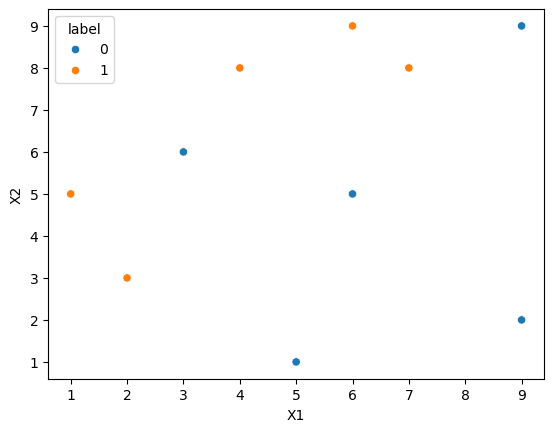

In [9]:
sns.scatterplot(x=df['X1'] , y=df['X2'] , hue=df['label'])

In [14]:
df['Weights'] = 1/df.shape[0]

In [15]:
df.head()

,X1,X2,label,Weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [26]:
X = df.iloc[:,:-2].values
y = df.iloc[:,2].values

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt1 = DecisionTreeClassifier(max_depth=2)

In [29]:
dt1 = dt1.fit(X,y)

In [30]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 8.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

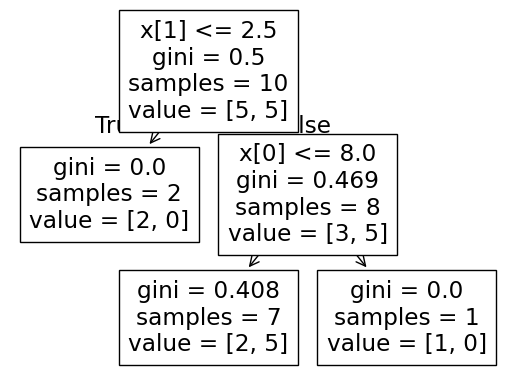

In [31]:
plot_tree(dt1)

<Axes: >

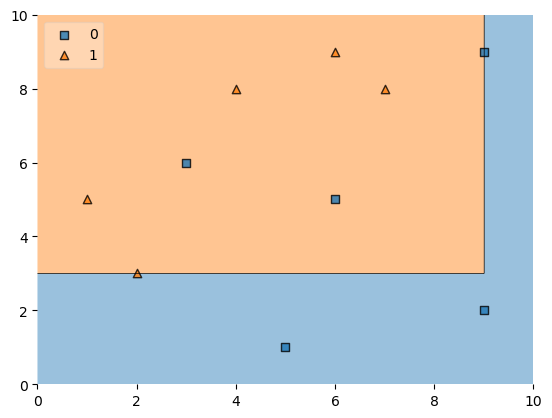

In [32]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [33]:
y_pred = dt1.predict(X)

In [36]:
df['y_pred'] = y_pred

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y_pred)

0.8

In [37]:
df

,X1,X2,label,Weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [39]:
# defining the model wt function

def calculate_model_wt(error):
    return 0.5*np.log((1-error)/(error))

In [43]:
# calculating the model wt.

alpha1 = calculate_model_wt(0.2)
alpha1

0.6931471805599453

In [46]:
# Step 4 - Update weights

def update_row_weights(row,alpha=0.69314):
  if row['label'] == row['y_pred']:
    return row['Weights'] * np.exp(-alpha)
  else:
    return row['Weights'] * np.exp(alpha)


In [47]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)


In [48]:
df

,X1,X2,label,Weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.050000
1,2,3,1,0.1,1,0.050000
2,3,6,0,0.1,1,0.199999
3,4,8,1,0.1,1,0.050000
4,5,1,0,0.1,0,0.050000
5,6,9,1,0.1,1,0.050000
6,6,5,0,0.1,1,0.199999
7,7,8,1,0.1,1,0.050000
8,9,9,0,0.1,0,0.050000
9,9,2,0,0.1,0,0.050000


In [49]:
df['updated_weights'].sum()

0.8000000000206241

In [50]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()


In [51]:
df

,X1,X2,label,Weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.050000,0.062500
1,2,3,1,0.1,1,0.050000,0.062500
2,3,6,0,0.1,1,0.199999,0.249998
3,4,8,1,0.1,1,0.050000,0.062500
4,5,1,0,0.1,0,0.050000,0.062500
5,6,9,1,0.1,1,0.050000,0.062500
6,6,5,0,0.1,1,0.199999,0.249998
7,7,8,1,0.1,1,0.050000,0.062500
8,9,9,0,0.1,0,0.050000,0.062500
9,9,2,0,0.1,0,0.050000,0.062500


In [53]:
df['nomalized_weights'].sum()

1.0